In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [2]:
data = pd.read_csv('Language Detection.csv')
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


Seeing the value count for each language

In [3]:
data['Language'].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

Separating the input and output

In [4]:
X = data['Text']
y = data['Language']

Since the output is categorical and words we need to convert it to numerical values using Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Text Preprocessing

Removing symbols and signs and brackets([])

In [6]:
# Creating a list to append the new text
text_list = []


# Iterating through data
for text in X:
    
    # Removing symbols and numbers from the test using the regex
    text = re.sub(r'[!@#$(),n%^&*?:;~`0-9]', ' ', text)

    # Removing square brackets
    text = re.sub(r'[[]]', ' ', text)

    # Converting it to lower order
    text = text.lower()

    # Appending the new text
    text_list.append(text)


C:\Users\goura\AppData\Local\Temp\ipykernel_3164\1760703886.py:12: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


Converting the input into numerical values using CountVectorizer

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(text_list).toarray()
X.shape

(10337, 34937)

Splitting into training and testing datasets

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model Training and Prediction

In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(x_test)

## Evaluating the model

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy Score is: {ac}")

Accuracy Score is: 0.9763056092843327


Plotting a heatmap to see the confusion matrix

<Axes: >

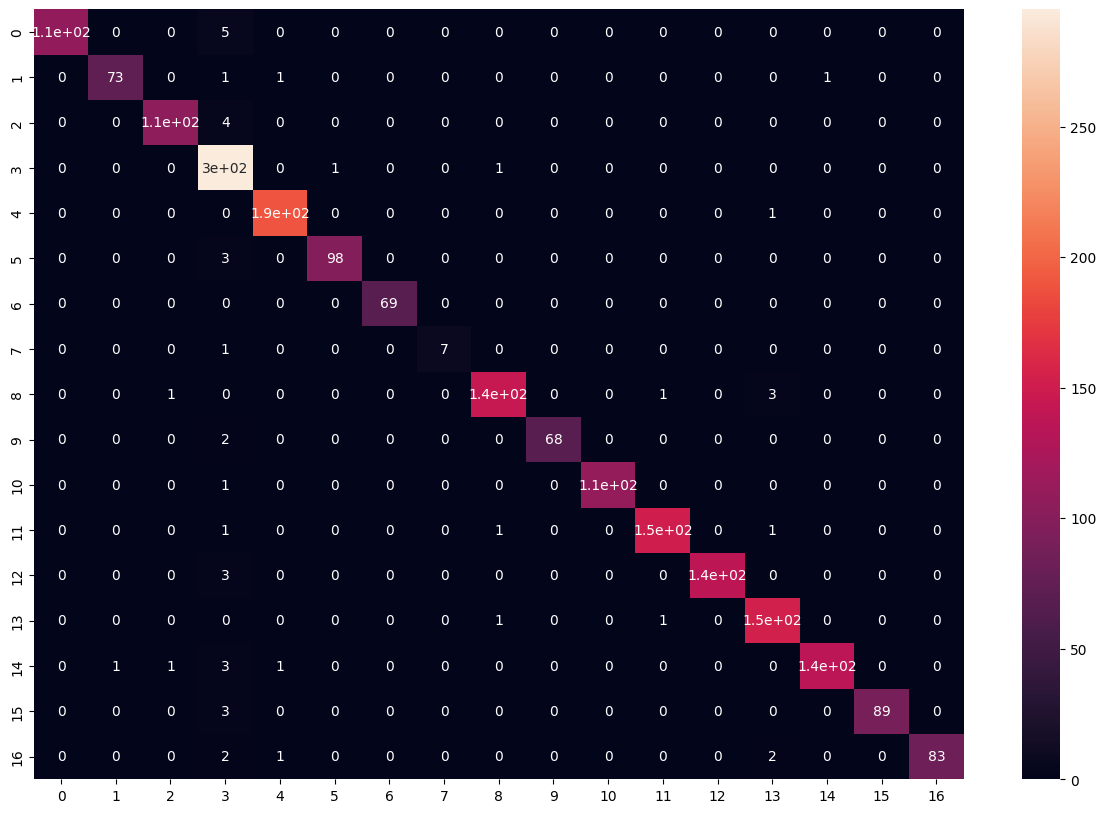

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True)

## Making some prediciton with text

In [13]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print(f"language is in: {lang[0]}")

In [19]:
predict("Hello Everyone")

language is in: English


In [15]:
predict("नमस्ते, मेरा नाम गौरव दास है")

language is in: Hindi


In [16]:
predict("Ciao, come stai")

language is in: Italian


In [17]:
predict("Olá, como vai")

language is in: Portugeese


In [18]:
predict("مرحبا، كيف حالك")

language is in: Arabic
